# Penerapan Dekomposisi Nilai Singular Untuk Mengkompresi Citra

In [1]:
import sys
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import ipywidgets as widgets
from numpy.core.fromnumeric import size

Paket OpenCV dapat mengambil data dari gambar, gif, maupun video. Fungsi `imread` akan mengembalikan nilai berupa `numpy.array`.

Image properties:
 Shape: (720, 1280, 3)
 Size:  2,764,800 bytes


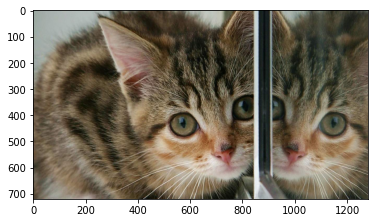

In [2]:
# Specify path relative to current file.
img_path = "./res/Cat.png"
# Read image and convert to the 3 channel BGR color.
img = cv.imread(img_path, cv.IMREAD_COLOR)

if img is None:
    sys.exit("Image could not be read.")
print("Image properties:\n",
    f"Shape: {img.shape}\n",
    f"Size:  {img.size:,} bytes")

# OpenCV uses BGR format while matplotlib uses RGB format.
img_plot = plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.show() 

Untuk memudahkan perhitungan, gambar yang awalnya memiliki tiga kanal warna diubah menjadi format keabuan yang memiliki satu kanal warna.

Image properties:
 Shape: (720, 1280)
 Size:  921,600 bytes


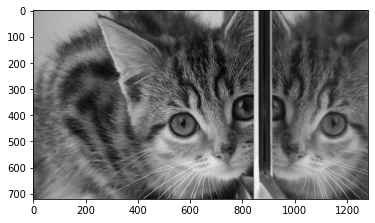

In [3]:
# Convert image into single channel greyscale format.
imgGrey = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
print("Image properties:\n",
    f"Shape: {imgGrey.shape}\n",
    f"Size:  {imgGrey.size:,} bytes")

imgGrey_plot = plt.imshow(imgGrey)
imgGrey_plot.set_cmap('gray')
plt.show()

## Dekomposisi Nilai Singular

**Dekomposisi nilai singular** adalah faktorisasi matriks persegi panjang berukuran $m \times n$ menjadi matrix vektor singular $U$, $V$ dan matriks diagonal nilai singular $\Sigma$.

$$
X = U \Sigma V^\top
$$

In [4]:
# Singular value decomposition
U, s, Vt = np.linalg.svd(imgGrey, full_matrices=False)
S = np.diag(s)

rSlider = widgets.IntSlider(
    value=s.size//2.41,
    min=0,
    max=s.size,
    step=s.size//100,
    description="Rank: ",
)
rText = widgets.IntText(description="Value: ")
widgets.link((rSlider, "value"), (rText, "value"))
widgets.VBox([rSlider, rText])

## Rekonstruksi Gambar

Jika $r$ kolom pertama matriks $U$, r nilai singular pertama matriks diagonal $\Sigma$, dan r kolom pertama matriks $V^\top$ dikalikan. Maka akan didapat nilai perkiraan matriks semula dari gambar yang didekomposisi.

Matrix properties:
U:
 Shape: (720, 298)
 Size:  214,560 bytes
S:
 Shape: (298, 298)
 Size:  88,804 bytes
S:
 Shape: (298, 1280)
 Size:  381,440 bytes
Total size: 684,804 bytes


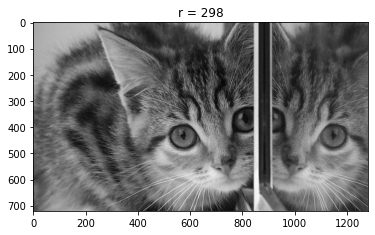

In [5]:
# Matrix reconstruction
imgApprox = U[:, :rSlider.value] @ S[0:rSlider.value, :rSlider.value] @ Vt[:rSlider.value, :]
print("Matrix properties:")
print("U:\n",
    f"Shape: {U[:, :rSlider.value].shape}\n",
    f"Size:  {U[:, :rSlider.value].size:,} bytes")
print("S:\n",
    f"Shape: {S[0:rSlider.value, :rSlider.value].shape}\n",
    f"Size:  {S[0:rSlider.value, :rSlider.value].size:,} bytes")
print("S:\n",
    f"Shape: {Vt[:rSlider.value, :].shape}\n",
    f"Size:  {Vt[:rSlider.value, :].size:,} bytes")
print(f"Total size: {U[:, :rSlider.value].size + S[0:rSlider.value, :rSlider.value].size + Vt[:rSlider.value, :].size:,} bytes")

imgApprox_plot = plt.imshow(imgApprox)
imgApprox_plot.set_cmap('gray')
plt.title('r = ' + str(rSlider.value))
plt.show()

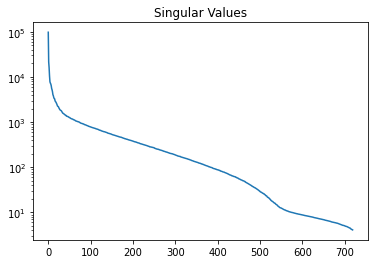

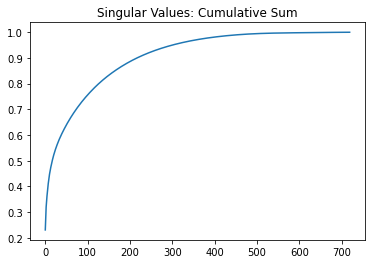

In [6]:
plt.figure(1)
plt.semilogy(np.diag(S))
plt.title("Singular Values")
plt.show()

plt.figure(2)
plt.plot(np.cumsum(np.diag(S))/np.sum(np.diag(S)))
plt.title("Singular Values: Cumulative Sum")
plt.show()